In [1]:
import os
import pathlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# load the dataset directory
data_dir = pathlib.Path("Flowers-Dataset/flowers")
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

4317

In [5]:
# plot samples
def plot_by_type(flower_type):
    type_dir = list(data_dir.glob(flower_type + "/*.jpg"))
    type_count = len(list(type_dir))
    if (type_count == 0):
        print("Invalid flower class!")
    else:
        PLOT_COUNT = 9
        ROW = 3
        COL = 3
        image_indices = [np.random.randint(0,type_count) for count in range(PLOT_COUNT)]
        
        plt.figure(figsize=(20,20))
        for images in range(PLOT_COUNT):
            plt.subplot(ROW, COL, images+1)
            plt.imshow(cv2.imread(str(type_dir[image_indices[images]]))[:,:,::-1])

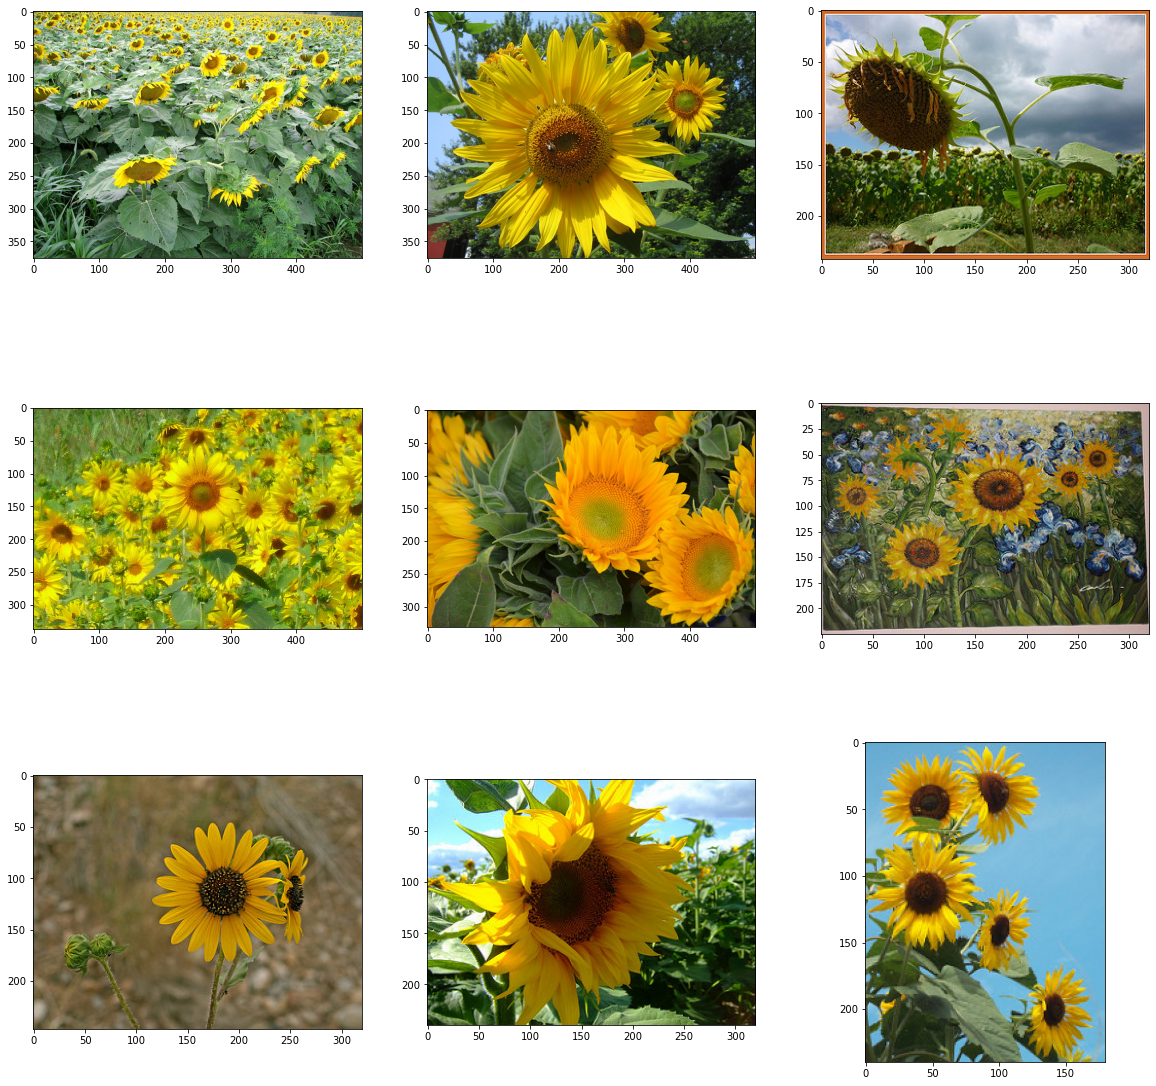

In [6]:
# example
plot_by_type("sunflower")

In [7]:
# load images off disk using keras.utils.image_dataset_from_directory
# set parameters
batch_size = 32
img_height = 180
img_width = 180

In [8]:
# training set
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [9]:
# validation and testing set
val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [10]:
# create separate validation and testing datasets
val_test_size = len(val_test_ds)
val_test_ds = val_test_ds.shuffle(50)
val_ds = val_test_ds.take(int(0.5*val_test_size))
test_ds = val_test_ds.skip(int(0.5*val_test_size))

In [11]:
# train without augmentation
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
108/108 [==============================] - 39s 359ms/step - loss: 1.3461 - accuracy: 0.4062 - val_loss: 1.1381 - val_accuracy: 0.5000
Epoch 2/10
108/108 [==============================] - 38s 348ms/step - loss: 1.0493 - accuracy: 0.5828 - val_loss: 1.0065 - val_accuracy: 0.5745
Epoch 3/10
108/108 [==============================] - 36s 330ms/step - loss: 0.9035 - accuracy: 0.6578 - val_loss: 0.9949 - val_accuracy: 0.6034
Epoch 4/10
108/108 [==============================] - 35s 327ms/step - loss: 0.7783 - accuracy: 0.7018 - val_loss: 1.0345 - val_accuracy: 0.5841
Epoch 5/10
108/108 [==============================] - 35s 324ms/step - loss: 0.6283 - accuracy: 0.7646 - val_loss: 1.0538 - val_accuracy: 0.6154
Epoch 6/10
108/108 [==============================] - 35s 325ms/step - loss: 0.4672 - accuracy: 0.8318 - val_loss: 1.4486 - val_accuracy: 0.5865
Epoch 7/10
108/108 [==============================] - 35s 325ms/step - loss: 0.3173 - accuracy: 0.8882 - val_loss: 1.2889 - val_ac

In [14]:
# testing model without augmentation
model.evaluate(
    test_ds
)

14/14 [==============================] - 1s 69ms/step - loss: 2.1740 - accuracy: 0.6094


[2.174015760421753, 0.609375]

In [15]:
# define augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [16]:
# train with augmentation
num_classes = 5

model_with_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model_with_augmentation.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model_with_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
108/108 [==============================] - 38s 348ms/step - loss: 1.2792 - accuracy: 0.4490 - val_loss: 1.1038 - val_accuracy: 0.5409
Epoch 2/15
108/108 [==============================] - 38s 348ms/step - loss: 1.0667 - accuracy: 0.5715 - val_loss: 0.9653 - val_accuracy: 0.5880
Epoch 3/15
108/108 [==============================] - 38s 348ms/step - loss: 0.9865 - accuracy: 0.6054 - val_loss: 0.9671 - val_accuracy: 0.6442
Epoch 4/15
108/108 [==============================] - 38s 347ms/step - loss: 0.9427 - accuracy: 0.6340 - val_loss: 0.9424 - val_accuracy: 0.6241
Epoch 5/15
108/108 [==============================] - 37s 346ms/step - loss: 0.8950 - accuracy: 0.6494 - val_loss: 0.8155 - val_accuracy: 0.6971
Epoch 6/15
108/108 [==============================] - 37s 346ms/step - loss: 0.8495 - accuracy: 0.6679 - val_loss: 0.8162 - val_accuracy: 0.6434
Epoch 7/15
108/108 [==============================] - 38s 347ms/step - loss: 0.8412 - accuracy: 0.6723 - val_loss: 0.8686 - val_ac

In [19]:
# testing model with augmentation
model_with_augmentation.evaluate(
    test_ds
)

14/14 [==============================] - 1s 74ms/step - loss: 0.6923 - accuracy: 0.7299


[0.6923046112060547, 0.7299107313156128]